In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing data
zoo_data = pd.read_csv('/home/suraj/Downloads/Assignments/Assignment-13/Zoo.csv')
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

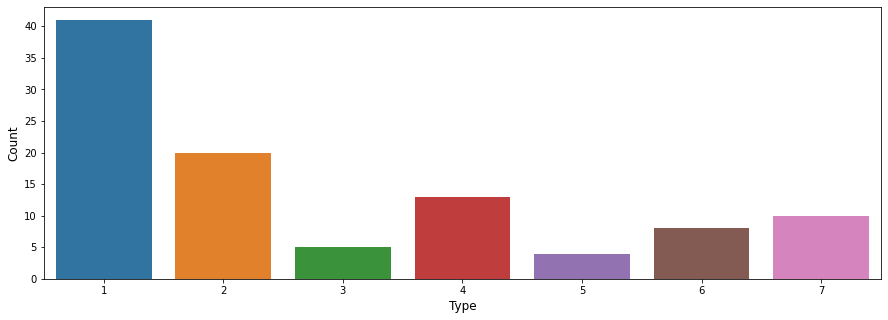

In [6]:
plt.figure(figsize=(15, 5))
    
sns.countplot(data=zoo_data, x="type")
plt.xlabel("Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [7]:
# model building
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [11]:
X = zoo_data.iloc[:,1:17]
y = zoo_data.iloc[:,-1:]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state= 12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80, 16), (80, 1), (21, 16), (21, 1))

In [20]:
## Model Training | Testing | Evaluation without NORMALIZATION
### Generating a Model with K = 3,5,7

knn_model1 = KNeighborsClassifier(n_neighbors=3)
knn_model1.fit(X_train,y_train)
y_train_pred = knn_model1.predict(X_train)
y_test_pred = knn_model1.predict(X_test)
print("Train Accuracy score: ", round(accuracy_score(y_train,y_train_pred),4))
print("Test Accuracy score: ", round(accuracy_score(y_test,y_test_pred),4))

Train Accuracy score:  0.975
Test Accuracy score:  0.9524


In [21]:
knn_model2 = KNeighborsClassifier(n_neighbors=5)
knn_model2.fit(X_train,y_train)
y_train_pred = knn_model2.predict(X_train)
y_test_pred = knn_model2.predict(X_test)
print("Train Accuracy score: ", round(accuracy_score(y_train,y_train_pred),4))
print("Test Accuracy score: ", round(accuracy_score(y_test,y_test_pred),4))

Train Accuracy score:  0.9375
Test Accuracy score:  0.9524


In [22]:
knn_model3 = KNeighborsClassifier(n_neighbors=7)
knn_model3.fit(X_train,y_train)
y_train_pred = knn_model3.predict(X_train)
y_test_pred = knn_model3.predict(X_test)
print("Train Accuracy score: ", round(accuracy_score(y_train,y_train_pred),4))
print("Test Accuracy score: ", round(accuracy_score(y_test,y_test_pred),4))

Train Accuracy score:  0.875
Test Accuracy score:  0.9048


In [24]:
# selection of best k value
from sklearn.model_selection import GridSearchCV, cross_val_score
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid={'n_neighbors':range(1,20),'weights':['uniform', 'distance']})
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [25]:
grid.best_params_, grid.best_score_

({'n_neighbors': 1, 'weights': 'uniform'}, 0.975)

In [27]:
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = knn_model,X=X,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [28]:
cv_scores

[0.9800000000000001,
 0.95,
 0.8809090909090909,
 0.8418181818181818,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7718181818181818,
 0.7218181818181818,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.6436363636363637,
 0.5936363636363635,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5536363636363636,
 0.5436363636363637,
 0.5345454545454545]

In [29]:
neighbours[cv_scores.index(max(cv_scores))], max(cv_scores)

(1, 0.9800000000000001)

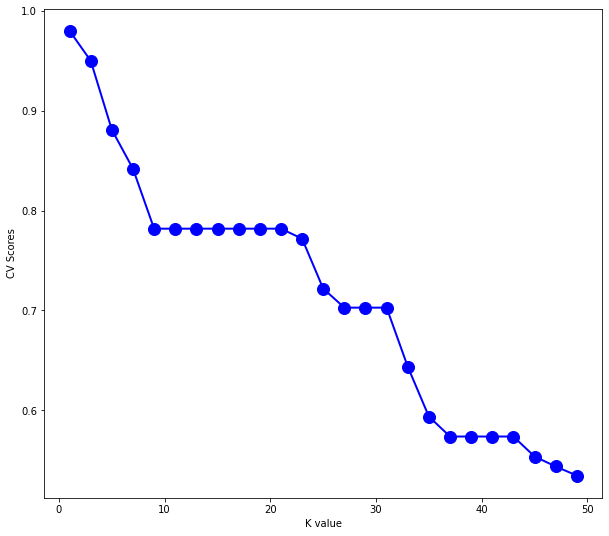

In [30]:
### Vizualizing the K neighbours wrt CV
plt.figure(figsize=(10,9))
plt.plot(neighbours,cv_scores,color='blue',marker= 'o',linewidth=2, markersize=12)
plt.xlabel('K value')
plt.ylabel('CV Scores')
plt.show()

### Rebuild the Model by choosing 1 as the neighrest neighbour

In [31]:
knn_final_model = KNeighborsClassifier(n_neighbors=1)
knn_final_model.fit(X_train,y_train)
y_train_pred = knn_final_model.predict(X_train)
y_test_pred = knn_final_model.predict(X_test)
print("Train Accuracy score: ", round(accuracy_score(y_train,y_train_pred),4))
print("Test Accuracy score: ", round(accuracy_score(y_test,y_test_pred),4))

Train Accuracy score:  1.0
Test Accuracy score:  1.0
